## INTUITION BEHIND KNN
##### It is mainly used for classification based problems but can be used in regression as well.

##### Here K represents the nearest neighbours we want to consider from a particular data point areanged in spatial dimensions say 2D, 3D or n dimensions...

##### After determining the K value the distance from the data point to its neighbours is calculated either using euclidian distance or manhattan distance.

##### Formula for Euclidian Distance---> d= [(x2-x1)**2 - (y2-y1)**2]**0.5

##### Formula for manhattan distance is the same as Pythagoras theorem for calculating the hypoteneuse-> d2= [(x2-x1)**2 - (y2-y1)**2]**0.5

##### After finding the distance the categories nearest to the datapoint are divided based on colors or other features in the graph.

##### Now the count of the categories in the neighbourhood is done and the category which dominates the other in terms of count is provided the nearest datapoint to be kept in his kitty....

##### point to be remembered is that the K value should always be odd because even K values will result in the equal distribution of the neighbourhood categories from the datapoint.

## For regression
##### the new datapoint placed between all other datapoints. based on the value of k the nearest neighbours will be calculated and then the average of all these datapoints will correspond the value of the new data point..

## What are outliers?
##### Outliers are data points that are far from other data points. In other words, they're unusual values in a dataset. Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.

##### always remove the outliers and balance the dataset in k nearest neighbours..

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [1]:
df= pd.read_csv(r"diabetes.csv")
df.head()

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
df.shape

(768, 9)

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

##### checking the null values in the dataset

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### data visualizations and correlation

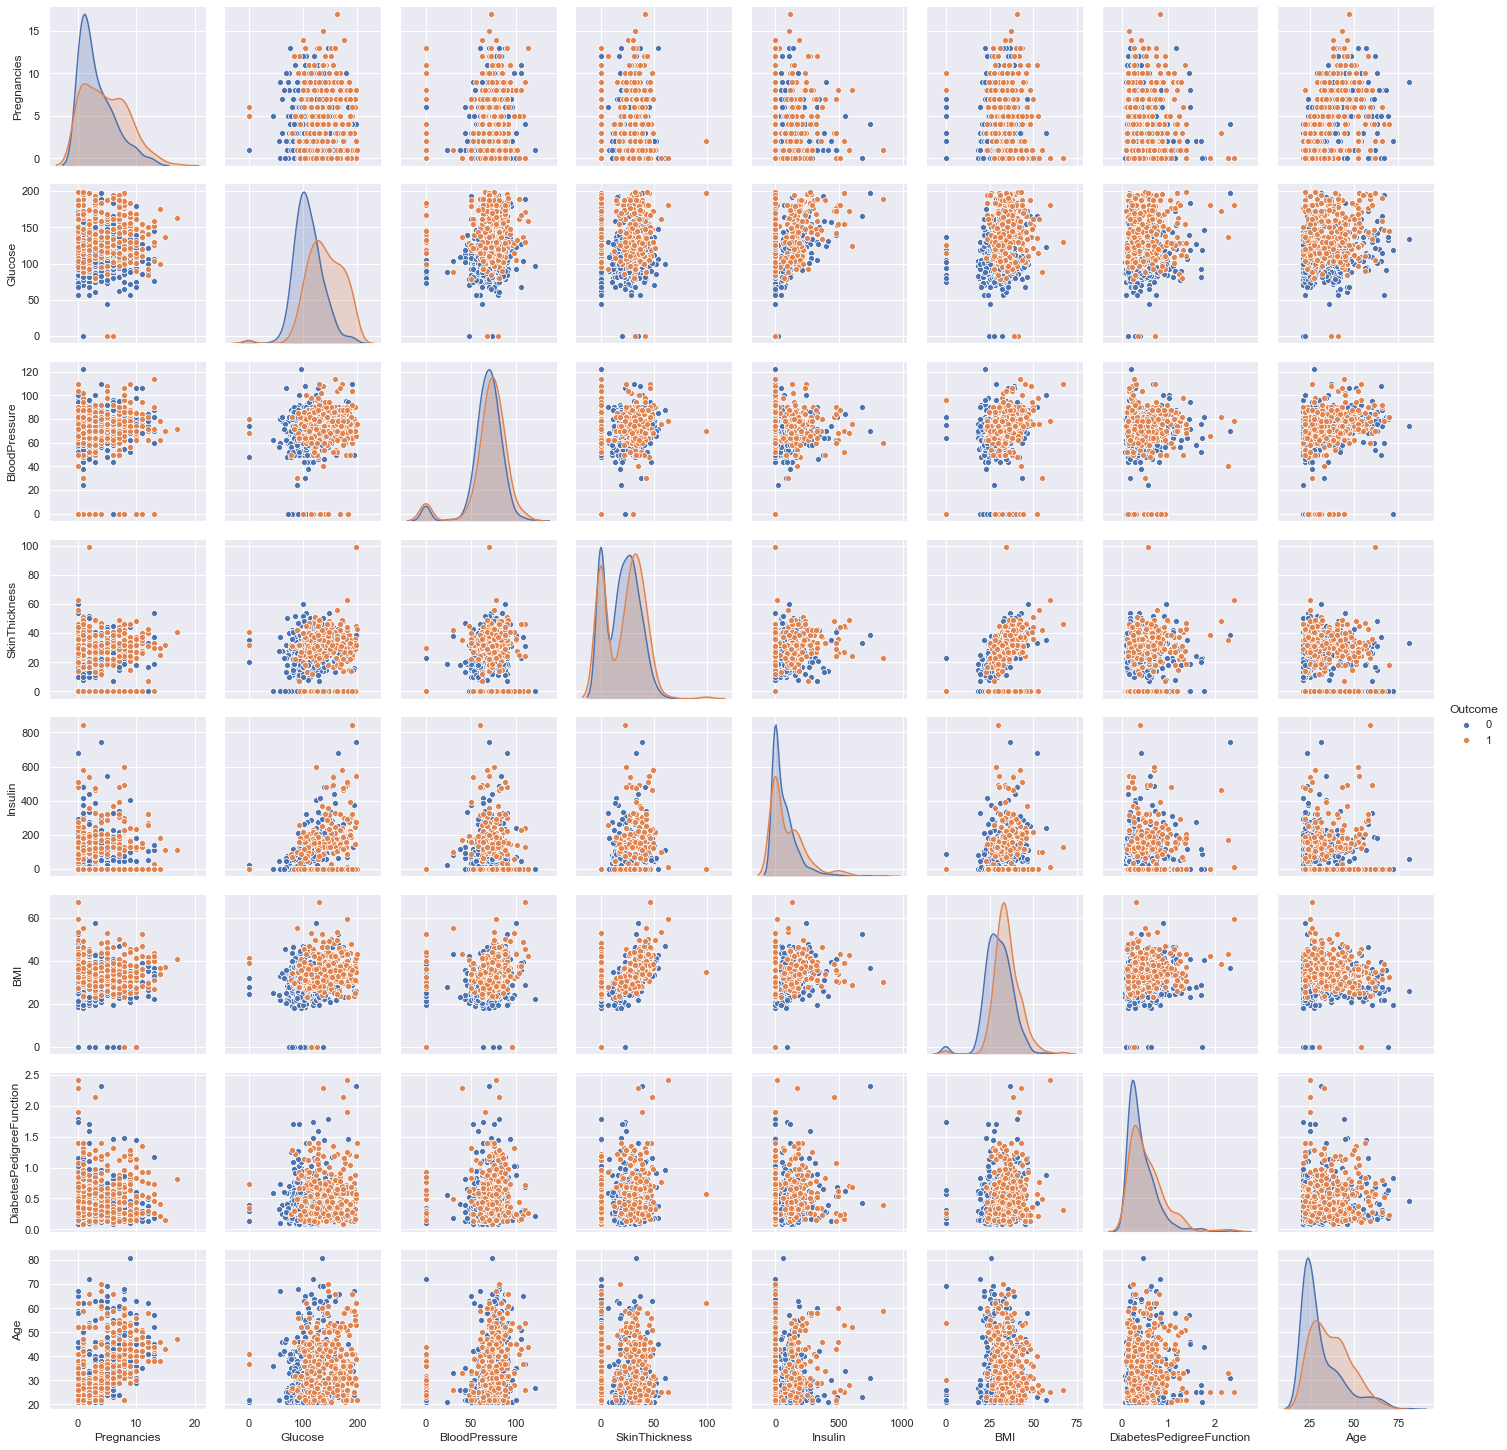

In [16]:
sns.pairplot(df, hue="Outcome")

##### the above plot represents the scatterplot of different features with each other with respect to the target

<IPython.core.display.Javascript object>

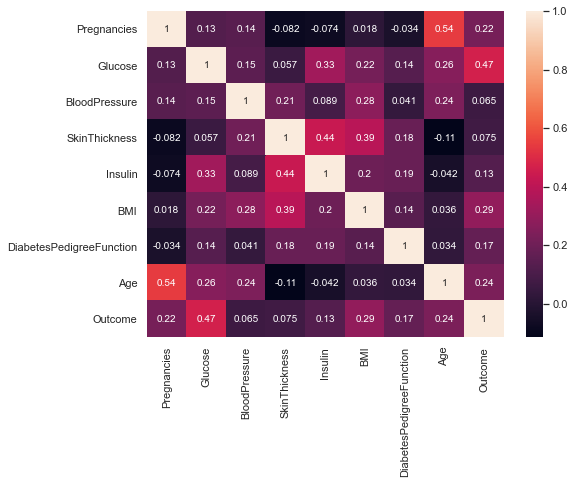

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

In [24]:
df.corr()["Outcome"][:-1]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Name: Outcome, dtype: float64

##### here we see a positive correlation wit the target for every feature

##### we will be dropping the least correlated features with the target and the threshold we will be using is 0.1 i.e., below this value the features will be eliminated

In [29]:
df_new= df.drop(["SkinThickness","BloodPressure"], axis=1)

In [30]:
df_new.shape

(768, 7)

In [33]:
df_new.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [36]:
df_new.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### boxplot to check the outliers

In [39]:
df_new.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome'],
      dtype='object')

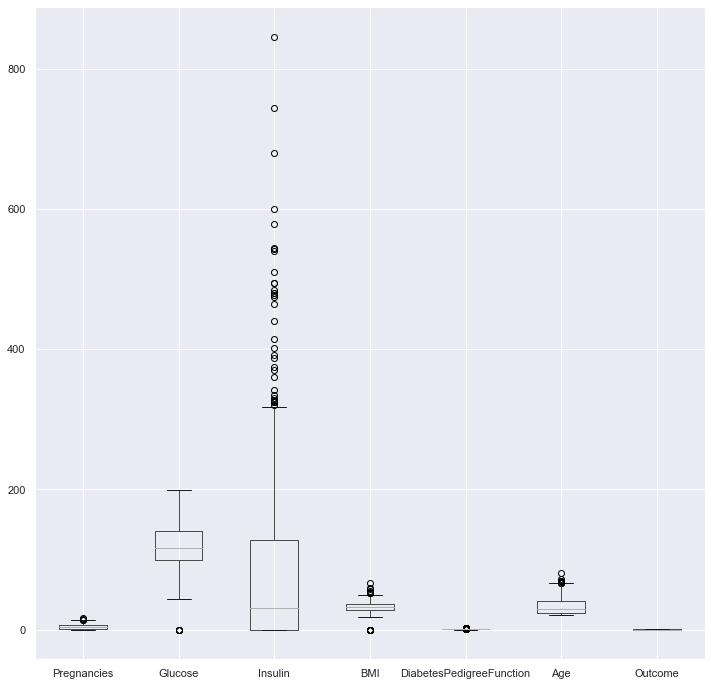

In [47]:
df_new.boxplot(figsize=(12,12))

##### here above we can see that there are many outliers present in the data that are crossing the quantile ranges so we need to remove them for a better predictive analysis

In [49]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [58]:
df_new_1 = df_new[~((df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new_1.shape, df_new.shape

((674, 7), (768, 7))

##### we have successfully removed the outliers now let's check the distribution of features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E78AA2AC0>,
      dtype=object)

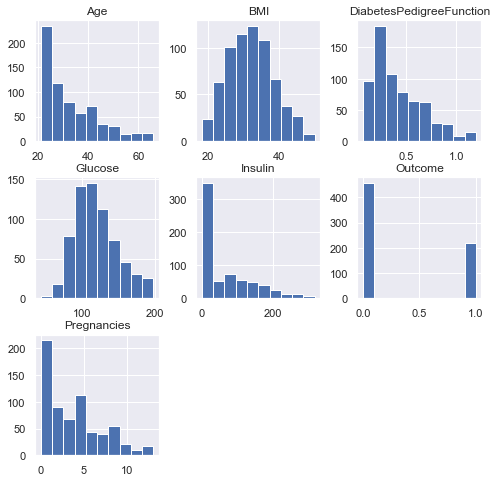

In [59]:
df_new_1.hist(figsize=(8,8))

##### here we can see that the data is not properly distributed for independent features and there is kind of right skewness in some features so let's bring them to a normal scale

In [60]:
df_new_1.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
5,5,116,0,25.6,0.201,30,0


In [61]:
X= df_new_1.drop("Outcome", axis=1)

In [62]:
y= df_new_1.Outcome

In [63]:
scaler= StandardScaler()

In [64]:
X_new= scaler.fit_transform(X)

In [65]:
X_new

array([[ 0.67318795,  0.97096032, -0.79790091,  0.23620211,  0.79373836,
         1.560567  ],
       [-0.85143798, -1.17716228, -0.79790091, -0.84103479, -0.3077819 ,
        -0.15898394],
       [ 1.28303832,  2.16436176, -0.79790091, -1.34887504,  0.97333406,
        -0.06848126],
       ...,
       [ 0.36826276,  0.05033635,  0.6200553 , -0.90259118, -0.73082954,
        -0.24948662],
       [-0.85143798,  0.22082227, -0.79790091, -0.30241634, -0.31576393,
         1.28905896],
       [-0.85143798, -0.90438481, -0.79790091, -0.25624904, -0.45145846,
        -0.88300539]])

In [66]:
y_new= np.array(y)

In [67]:
y_new

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [68]:
X_train, X_test, y_train, y_test= train_test_split(X_new, y_new, test_size=0.3, random_state=10)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

##### detecting the best possible value of k as per the error rate

In [71]:
error_rate=[]
for i in range(1,40):

  knn= KNeighborsClassifier(n_neighbors=i)
  score= cross_val_score(knn, X_new, y_new, cv=10)
  error_rate.append(1-score.mean())

In [72]:
len(error_rate)

39

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

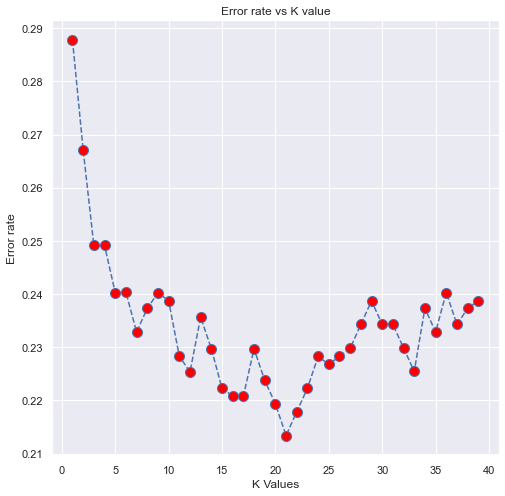

In [73]:
plt.figure(figsize=(8,8))
plt.plot(range(1,40), error_rate, color="b", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error rate vs K value")
plt.xlabel("K Values")
plt.ylabel("Error rate")
plt.show()

##### here we see that the error rate suddenly drops at K value of 21 and then again starts increasing so we will take K= 21 as our value for prediction

##### training the model and making predictions

In [74]:
knn= KNeighborsClassifier(n_neighbors=21)

In [75]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [76]:
pred= knn.predict(X_test)

In [77]:
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1], dtype=int64)

In [79]:
knn.score(X_test,y_test), knn.score(X_train,y_train)

(0.7635467980295566, 0.7919320594479831)

In [81]:
s=classification_report(y_test,pred)

In [83]:
s

'              precision    recall  f1-score   support\n\n           0       0.81      0.87      0.84       145\n           1       0.60      0.50      0.55        58\n\n    accuracy                           0.76       203\n   macro avg       0.71      0.68      0.69       203\nweighted avg       0.75      0.76      0.76       203\n'

##### saving the model as pickle file

In [84]:
import joblib

joblib.dump(knn, 'KNNPROJECT.pkl')

['KNNPROJECT.pkl']